In [2]:
# 영화 리뷰 분류(이진분류)
# 영화 리뷰를 긍정, 부정으로 분류
import keras
keras.__version__

'2.7.0'

In [3]:
# IMDB 데이터셋(케라스에 내장된 데이터셋, 숫자로 전처리되어 있음, 17MB정도의 데이터셋)
# 영화 리뷰 50,000개의 데이터셋
# 학습용 데이터 25,000개와 검증용 데이터, 25,000개 각각 50%는 부정, 50%는 긍정 리뷰로 구성
# train_data, test_data : 리뷰의 목록
# 각 리뷰는 단어 인덱스의 리스트(단어 시퀀스가 인코딩된 것)
# train_labels, test_labels : 부정 0, 긍정 1
from tensorflow.keras.datasets import imdb

(train_data, train_labels),(test_data, test_labels)=imdb.load_data(num_words=10000)
# num_words=10000 : 최빈 단어 10,000개만 사용, 드물게 나타나는 단어는 무시

17473536/17464789 [==============================] - 2s 0us/step


In [4]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [5]:
train_labels[0]

1

In [6]:
max([max(sequence) for sequence in train_data])

9999

In [9]:
# 리뷰 데이터 하나를 원래 영어 단어로 어떻게 바꾸는지 확인
# word_index : 단어와 정수 인덱스를 mapping한 딕셔너리
word_index=imdb.get_word_index()
print(list(word_index.items())[0:10])

# 정수 인덱스와 단어의 순서를 바꾼 리스트
reverse_word_index=dict([(value,key) for (key, value) in word_index.items()])
print(list(reverse_word_index.items())[0:10])


[('fawn', 34701), ('tsukino', 52006), ('nunnery', 52007), ('sonja', 16816), ('vani', 63951), ('woods', 1408), ('spiders', 16115), ('hanging', 2345), ('woody', 2289), ('trawling', 52008)]
[(34701, 'fawn'), (52006, 'tsukino'), (52007, 'nunnery'), (16816, 'sonja'), (63951, 'vani'), (1408, 'woods'), (16115, 'spiders'), (2345, 'hanging'), (2289, 'woody'), (52008, 'trawling')]


In [10]:
# 데이터 준비
# 신경망에 숫자 리스트를 입력할 수는 없음
# 리스트를 one-hot 인코딩 : 0과 1의 벡터로 변환
# 예를 들면 [3,5]의 경우 인덱스 3과 5의 위치를 1로 나머지는 모두 0으로 변환
# x축 문장(25000개), y축 전체 단어(10000개)
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # 크기가 (len(sequences), dimension)이고 모든 원소가 0인 행렬을 생성, 제로 패딩
    results=np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence]=1. # result[i]에서 특정 인덱스의 위치를 1로 나머지는 0으로 채움(원핫인코딩)
    return results
x_train=vectorize_sequences(train_data) # 학습용 데이터를 2차원 벡터(행렬)로 변환
x_test=vectorize_sequences(test_data) # 검증용 데이터를 2차원 벡터(행렬)로 변환

In [11]:
# 변환된 샘플의 형태
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [12]:
# 레이블을 1차원 벡터로 변환
y_train=np.asarray(train_labels).astype('float32')
y_test=np.asarray(test_labels).astype('float32')

In [13]:
# 신경망 모델 만들기
from tensorflow.keras import models
from tensorflow.keras import layers

model=models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,))) # 은닉층 1(16개의 노드)
model.add(layers.Dense(16, activation='relu')) # 은닉층 2(16개의 노드)
model.add(layers.Dense(1, activation='sigmoid')) # 출력층

In [14]:
# 이진 분류 문제이고 신경망의 출력이 확률일 경우 binary_crossentropy 손실함수가 적합
# rmsprop 옵티마이저와 binary_crossentropy 손실함수 사용
# 학습하는 동안 정확도를 사용해 모니터링
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [15]:
# Train, Validation 구분
x_val=x_train[:10000]
partial_x_train=x_train[10000:]
y_val=y_train[:10000]
partial_y_train=y_train[10000:]

In [16]:
# 512개 샘플씩 5회 학습
# 검증용 데이터셋으로 손실과 정확도 측정
history=model.fit(partial_x_train, partial_y_train, epochs=10, batch_size=512, validation_data=(x_val,y_val))
results=model.evaluate(x_test[:1000], y_test[:1000], verbose=0)

Epoch 1/10
30/30 [==============================] - 13s 221ms/step - loss: 0.5539 - accuracy: 0.7725 - val_loss: 0.4323 - val_accuracy: 0.8645
Epoch 2/10
30/30 [==============================] - 1s 28ms/step - loss: 0.3417 - accuracy: 0.8961 - val_loss: 0.3253 - val_accuracy: 0.8867
Epoch 3/10
30/30 [==============================] - 1s 27ms/step - loss: 0.2465 - accuracy: 0.9209 - val_loss: 0.2864 - val_accuracy: 0.8909
Epoch 4/10
30/30 [==============================] - 1s 27ms/step - loss: 0.1940 - accuracy: 0.9367 - val_loss: 0.2729 - val_accuracy: 0.8917
Epoch 5/10
30/30 [==============================] - 1s 29ms/step - loss: 0.1563 - accuracy: 0.9525 - val_loss: 0.2885 - val_accuracy: 0.8836
Epoch 6/10
30/30 [==============================] - 1s 27ms/step - loss: 0.1315 - accuracy: 0.9579 - val_loss: 0.2836 - val_accuracy: 0.8877
Epoch 7/10
30/30 [==============================] - 1s 28ms/step - loss: 0.1071 - accuracy: 0.9682 - val_loss: 0.2969 - val_accuracy: 0.8866
Epoch 8/10


In [17]:
# model.fit() : History 객체 리턴
# 학습하는 동안 발생한 모든 정보 저장
history_dict=history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

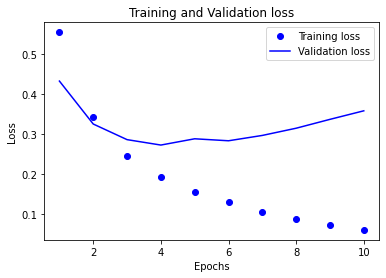

In [18]:
# 학습용과 검증용 데이터에 대한 손실과 정확도 출력
import matplotlib.pyplot as plt

loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,11)
plt.plot(epochs, loss, 'bo', label='Training loss') # bo : 파란색 점선
plt.plot(epochs, val_loss, 'b', label='Validation loss') # b : 파란색 실선
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

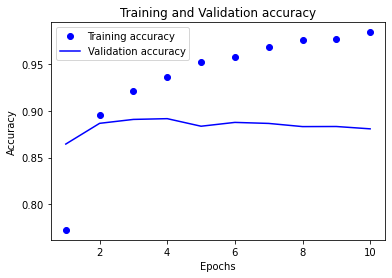

In [19]:
plt.clf()
acc=history_dict['accuracy']
val_acc=history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training accuracy') # bo : 파란색 점선
plt.plot(epochs, val_acc, 'b', label='Validation accuracy') # b : 파란색 실선
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [20]:
# 새로운 데이터에 대해 예측
# 어떤 리뷰에 대한 긍정 확률 예측
model.predict(x_test[:1000])

array([[7.98879415e-02],
       [9.99994993e-01],
       [9.66544867e-01],
       [8.96517813e-01],
       [9.72170115e-01],
       [9.74056542e-01],
       [9.96206164e-01],
       [3.03870323e-03],
       [9.47533607e-01],
       [9.99817550e-01],
       [9.47932065e-01],
       [1.94153772e-03],
       [1.07757260e-05],
       [2.61760480e-03],
       [9.99934316e-01],
       [1.49250827e-05],
       [8.51558805e-01],
       [4.86370265e-01],
       [1.13136775e-03],
       [1.50737539e-02],
       [9.99955416e-01],
       [9.99621630e-01],
       [4.96971048e-02],
       [9.85978127e-01],
       [7.95175910e-01],
       [9.99194682e-01],
       [1.36514083e-01],
       [9.33055878e-01],
       [9.96706665e-01],
       [8.68423958e-05],
       [9.99740064e-01],
       [4.60944995e-02],
       [8.97078574e-01],
       [3.66039473e-07],
       [1.00642676e-02],
       [3.37497424e-03],
       [9.99976873e-01],
       [9.97539520e-01],
       [4.97935712e-02],
       [3.51066771e-03],
